In [10]:
import numpy as np
import rubidium as rb
import matplotlib.pyplot as plt
from scipy.constants import hbar, e, epsilon_0, c, m_u, k, m_e, alpha

In [11]:
def Pressure(T):
    """Vapor pressure in a thermal cell
    expects T in Kelvin"""
    # return 7e-8 # <--- USE THIS for finding background P
    if (T<312.46):
        return 10**( -94.04826 - 1961.258/T - 0.03771687*T + 42.57526*np.log10(T) )
    else:
        return 10**( 15.88253 - 4529.635/T + 0.00058663*T - 2.99138*np.log10(T) )

In [20]:
T = 200
N = Pressure(T)*133.323/(k*T)


Text(0, 0.5, 'n')

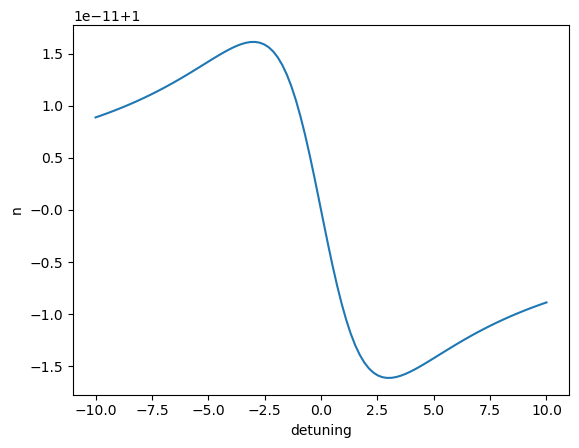

In [22]:
lambda_at = 780*1e-9
gamma = 6 #MHz

detuning = np.linspace(-10,10,100)

chi1 = -N*3*((lambda_at**3)/(4*np.pi**2))*((2*detuning/gamma)-1j)/(1+4*(detuning/gamma)**2)
disp_indice = np.real(np.sqrt(1+chi1))

plt.plot(detuning,disp_indice)
plt.xlabel('detuning')
plt.ylabel('n')